In [17]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [19]:
random_runs = [
    "kobybibas/pnml_for_active_learning/2wveodh5",
    "kobybibas/pnml_for_active_learning/2zdwt6p9",
    "kobybibas/pnml_for_active_learning/1kxnmmfk",
    "kobybibas/pnml_for_active_learning/1pde24jz",
    "kobybibas/pnml_for_active_learning/3d8zztpy",
    "kobybibas/pnml_for_active_learning/27evmn5h",
]
bald_runs = [
    "kobybibas/pnml_for_active_learning/18alsmy8",
    "kobybibas/pnml_for_active_learning/2wi09eg2",
    "kobybibas/pnml_for_active_learning/qdpvcdiq",
    "kobybibas/pnml_for_active_learning/2255euwa",
    "kobybibas/pnml_for_active_learning/3oxmtm94",
    "kobybibas/pnml_for_active_learning/2hwyn859",
]
pnml_runs = [
    'kobybibas/pnml_for_active_learning/f8vdemyk',
    'kobybibas/pnml_for_active_learning/293fo40c',
    'kobybibas/pnml_for_active_learning/2yk11gfw',
    'kobybibas/pnml_for_active_learning/2jacpjdx',
    'kobybibas/pnml_for_active_learning/10b91z3f',
    'kobybibas/pnml_for_active_learning/2nzpapfg'
    # "kobybibas/pnml_for_active_learning/5ha1av12",
    # "kobybibas/pnml_for_active_learning/2ozptpz4",
    # "kobybibas/pnml_for_active_learning/3ksy6gz5",
    # "kobybibas/pnml_for_active_learning/2snq968c",
    # "kobybibas/pnml_for_active_learning/1x6wpk6t",
    # "kobybibas/pnml_for_active_learning/se9njtao",
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2wveodh5
kobybibas/pnml_for_active_learning/2zdwt6p9
kobybibas/pnml_for_active_learning/1kxnmmfk
kobybibas/pnml_for_active_learning/1pde24jz
kobybibas/pnml_for_active_learning/3d8zztpy
kobybibas/pnml_for_active_learning/27evmn5h
kobybibas/pnml_for_active_learning/18alsmy8
kobybibas/pnml_for_active_learning/2wi09eg2
kobybibas/pnml_for_active_learning/qdpvcdiq
kobybibas/pnml_for_active_learning/2255euwa
kobybibas/pnml_for_active_learning/3oxmtm94
kobybibas/pnml_for_active_learning/2hwyn859
kobybibas/pnml_for_active_learning/f8vdemyk
kobybibas/pnml_for_active_learning/293fo40c
kobybibas/pnml_for_active_learning/2yk11gfw
kobybibas/pnml_for_active_learning/2jacpjdx
kobybibas/pnml_for_active_learning/10b91z3f
kobybibas/pnml_for_active_learning/2nzpapfg


In [20]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)


MNIST


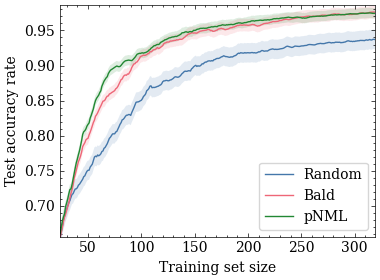

In [21]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(random_res,bald_res,pnml_res,fig,ax)
print("MNIST")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist.pdf"))
plt.show()